# Módulo 5 Actividad 5

### Intención del aprendizaje esperado:


5. Elabora un modelo predictivo aplicando el algoritmo K-NN para resolver un problema de clasificación utilizando lenguaje Python.


### Ejercicios Planteados


**El objetivo del ejercicio actual es utilizar medidas físicas para predecir la edad del abulón, usando el algoritmo K-NN**


*Datos:*

In [1]:
import pandas as pd
url = (
 "https://archive.ics.uci.edu/ml/machine-learning-databases"
 "/abalone/abalone.data"
)
abalone = pd.read_csv(url, header=None)
abalone.columns = [
 "Sex",
 "Length",
 "Diameter",
 "Height",
 "Whole weight",
 "Shucked weight",
 "Viscera weight",
 "Shell weight",
 "Rings",
]
abalone.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


1. Lo primero que debe hacer es eliminar la variable “Sex”.

In [2]:

df_abalone = pd.DataFrame(abalone)
df_abalone = df_abalone.drop('Sex', axis=1)
df_abalone.tail()



,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


2. Realice estadística descriptiva para el conjunto de datos entregados.

In [3]:
df_abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


3. La variable objetivo es “Rings”, por lo que muestre la distribución de estos datos e interprete.

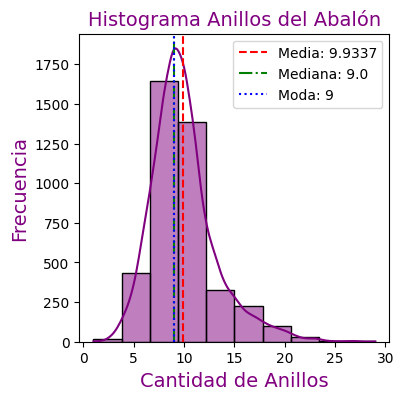

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

media_anillos = np.mean(df_abalone['Rings'])
mediana_anillos = np.median(df_abalone['Rings'])
des_std_anillos = np.std(df_abalone['Rings'])
moda_anillos = df_abalone['Rings'].mode()[0]

figure =  plt.figure(figsize=(4, 4))

sns.histplot(data = df_abalone, x= 'Rings', bins=10, color='purple', kde=True)

plt.axvline(media_anillos , color='red', linestyle='--', label = f'Media: {media_anillos:.4f}')
plt.axvline(mediana_anillos , color='green', linestyle='-.', label = f'Mediana: {mediana_anillos}')
plt.axvline(moda_anillos, color='blue', linestyle=':', label = f'Moda: {moda_anillos}')

plt.title('Histograma Anillos del Abalón', fontsize=14, color='purple')
plt.xlabel('Cantidad de Anillos', fontsize=14, color='purple')
plt.ylabel('Frecuencia', fontsize=14, color='purple')


plt.legend()
plt.show()

Al graficar la distribución de los datos relacionados con la cantidad de anillos del 'abalone' podemos observar un comportamiento de distribución Normal.  En cuanto a sus medidas de tendencia central, la moda (valor que más veces se repite entre todos los valores) es el mismo valor de la mediana (valor que se encuentra en la mitad de la distribución luego de que los datos son ordenados numéricamente), en adición el valor de su media es bastante cercano a las otras dos medidas ya mencionadas, en consideración de la cantidad de eventos registrados.

En resumen la distribución de los datos nos permiten aplicar métodos estadísticos y presenta algunas ventajas al generar un modelo de clasificación KNN.

4. Entregue la matriz de correlación ¿Qué variables pueden estar correlacionadas?

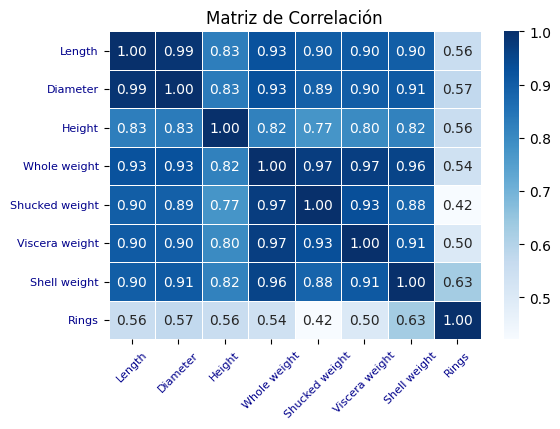

In [5]:
matriz_correlacion = df_abalone.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(matriz_correlacion, annot=True, cmap='Blues', fmt='.2f', linewidths=.5)

plt.title('Matriz de Correlación')
plt.xticks(fontsize=8, color='darkblue', rotation=45)
plt.yticks(fontsize=8, color='darkblue')

plt.show()


El gráfico *mapa de calor* nos permite visualizar de mejor manera la correlación entre las variables pudiendo observar que las relacionados con el tamaño y la masa de los abalones tienen una correlación alta entre ellas.  Por otra parte la variable anillos es baja contra las variables antes referidas.  Mención especial para la variable Height (altura) que mantiene una correlación menor entre todas las variables relacionadas con tamaño y masa, sin embargo sigue siendo mas alta que la variable Anillos.

Respecto a la variable target ('Rings'), su correlación más alta es cono la variable 'Shell weight'.

5. Defina las distancias en los vectores de las variables independientes. Para esto puede usar el atributo .values de Numpy
6. Guarde los datos en una matriz y úselo en este código:

**distances = np.linalg.norm(X - new_data_point, axis=1)**

*Observación:  Debido a que el ejercicio indica el uso de una variable que representa un nuevo registro (new_data_point), quitaré del mismo dataframe el últimno registro para usar sus datos como new_data_point de tal manera de no tener que inventar datos.  Probé inicialmente sin quitar el registro del dataframe pero como los datos ya se encontraban en él, el registro se autoelegía a si mismo lo que implicaba un sesgo.  De la misma forma, como sabemos la cantidad de anillos que tiene el registro que usaremos de prubea nos permitirá comprobar si el modelo predice bien la cantidad de anillos*


In [6]:
new_dataframe = df_abalone.tail(1) # Crea df con el ultimo elemento de la dataframe original
df_abalone_lastless = df_abalone.drop(df_abalone.tail(1).index) # Crea df_abalone_lastless sin el ultimo elemento de df_abalone


In [7]:
# Variables independientes
X = df_abalone_lastless.drop('Rings', axis=1)
X = X.values
# Variables dependientes
y = df_abalone_lastless['Rings']
y = y.values

# Variable independientes para ejemplo
new_data_point = new_dataframe.drop('Rings', axis=1)
new_data_point = new_data_point.values
# Variable dependiente de comprobación de ejemplo
y_new_data_point = new_dataframe['Rings']
y_new_data_point = y_new_data_point.values

distances = np.linalg.norm(X - new_data_point, axis=1)

k = 3
ids_nearest_neighbor = distances.argsort()[:k]

anillos_nearest_neighbor = y[ids_nearest_neighbor]
prediccion_regresion = np.mean(anillos_nearest_neighbor)

print(' ANTECEDENTES '.center(60,'='))
print()
print(f'Variable Dependiente de Prueba'.ljust(50, '.') + f' {list(y_new_data_point)}'.rjust(10, '.'))
print(f'K para Vecinos Mas Cercanos'.ljust(50, '.') + f' {k}'.rjust(10, '.'))
print(f'Ids Vecinos mas Cercanos'.ljust(40, '.') + f' {list(ids_nearest_neighbor)}'.rjust(20,'.'))
print(f'Cantidad de Anillos Vecinos más Cercanos'.ljust(40, '.') + f' {list(anillos_nearest_neighbor)}'.rjust(20, '.'))
print(f'Predicción de Anillos del Modelo'.ljust(50, '.') + f' {prediccion_regresion}'.rjust(10,'.'))
print()
print(60 * '=')



======================= ANTECEDENTES =======================

Variable Dependiente de Prueba......................... [12]
K para Vecinos Mas Cercanos............................... 3
Ids Vecinos mas Cercanos................. [1421, 1203, 2708]
Cantidad de Anillos Vecinos más Cercanos....... [13, 12, 11]
Predicción de Anillos del Modelo....................... 12.0



*Observación: Debido a que la variable independiente 'Rings' es numérica y no categórica, el ejercicio debe ser de predicción mediante regresión en vez de clasificación.  En este caso, esto implicaría que la predicción se debe realizar mediante el cálculo del promedio de los 3 vecinos más cercanos.  El valor resultante es 12, que en este caso coincide con el valor real de la etiqueta.*